<a href="https://colab.research.google.com/github/Skula33/FDSFE_SKulakowski/blob/main/HW2_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Importing our Packages
import pandas as pd
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Reading in our Dataset
movies_df = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/blob/main/data/movies_metadata.csv.zip?raw=true", compression = 'zip')

In [20]:
print("The movies_df dataframe has dimensions:", format(movies_df.shape))

The movies_df dataframe has dimensions: (45466, 24)


In [21]:
# Printing the first 5 lines of the dataset
movies_df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [22]:
# Printing the last 5 lines of the dataset
movies_df.tail(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [23]:
# What are the Columns of the dataset??
columns = movies_df.columns
columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [24]:
# Quick Descriptive statistics of our numeric columns
movies_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
revenue,45460.0,1.120935e+07,6.433225e+07,0.0,0.0,0.0,0.0,2.787965e+09
runtime,45203.0,9.412820e+01,3.840781e+01,0.0,85.0,95.0,107.0,1.256000e+03
vote_average,45460.0,5.618207e+00,1.924216e+00,0.0,5.0,6.0,6.8,1.000000e+01
vote_count,45460.0,1.098973e+02,4.913104e+02,0.0,3.0,10.0,34.0,1.407500e+04


We have different values in our 'count' column likely due to the fact that there are missing values in our dataframe.

In [25]:
# Number of missing values per column
movies_df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

There are a total of 263 missing values in the `runtime` column.

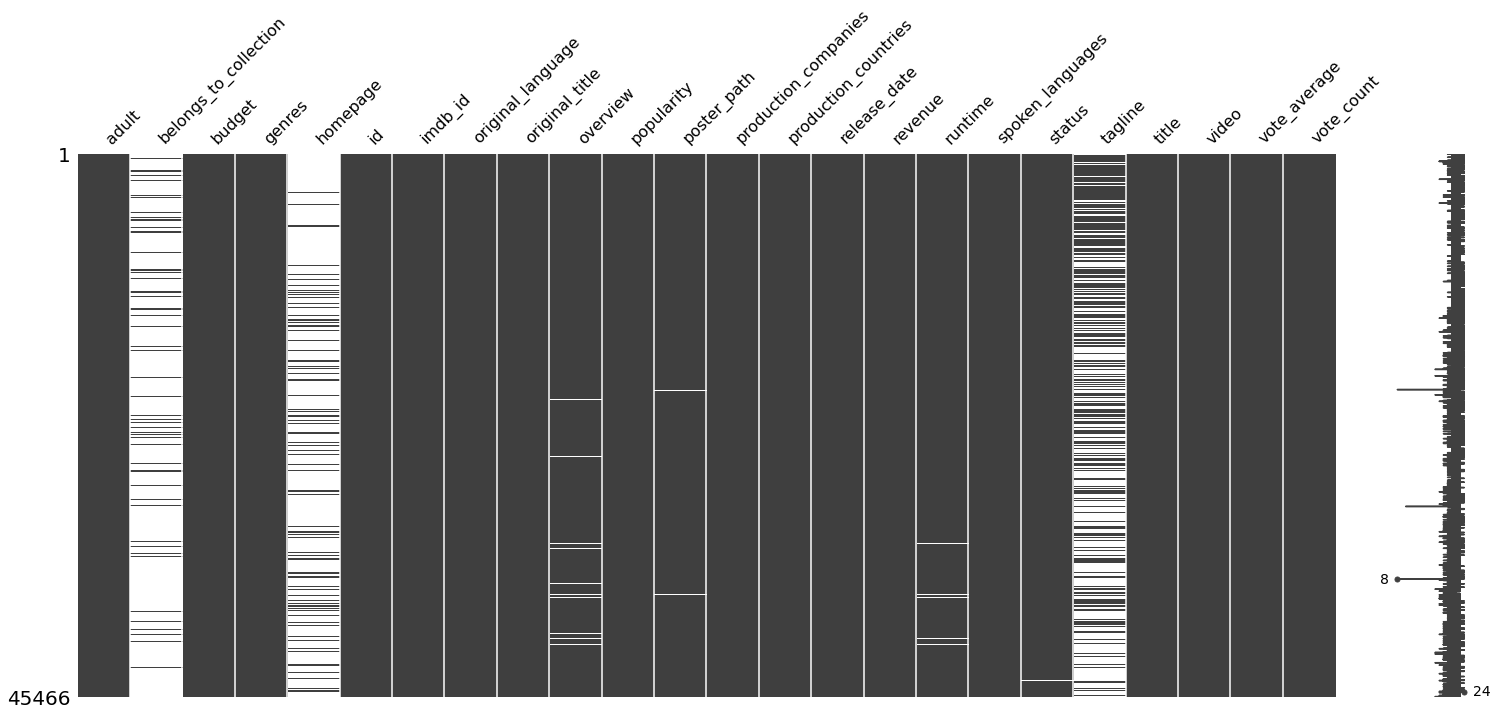

In [26]:
# Initial Missing_values Matrix
msno.matrix(movies_df);

Looking at the quantity of missing values in each respective column we can state that we should likely remove `belongs_to_collection`, `homepage`, `tagline`. Why? Well we can see from the **missingno** matrix that we have a majority of missing values in these columns.

In [27]:
movies_df.drop(['belongs_to_collection', 'homepage', 'tagline'], axis = 1, inplace = True)

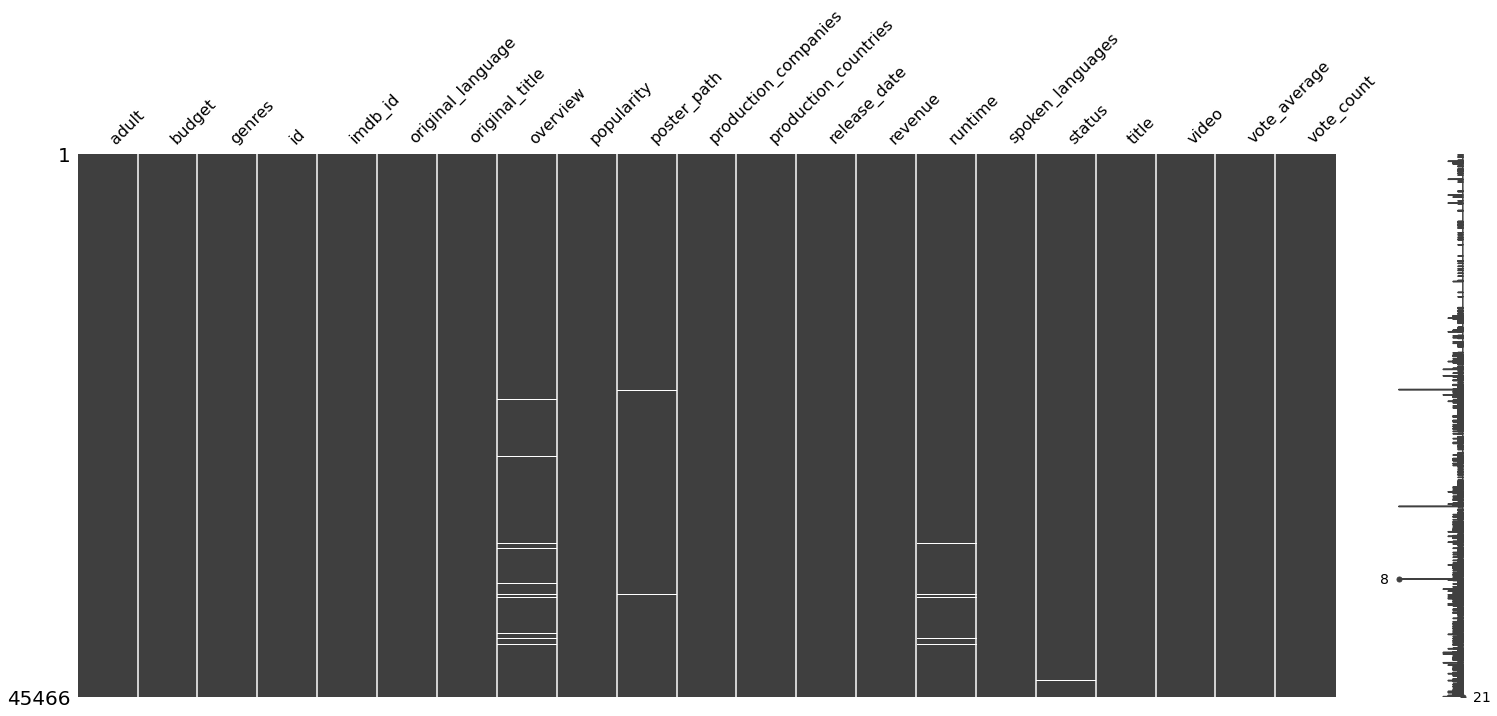

In [28]:
# Cleaned Matrix
msno.matrix(movies_df);

In [29]:
movies_df_cleaned = movies_df.dropna()

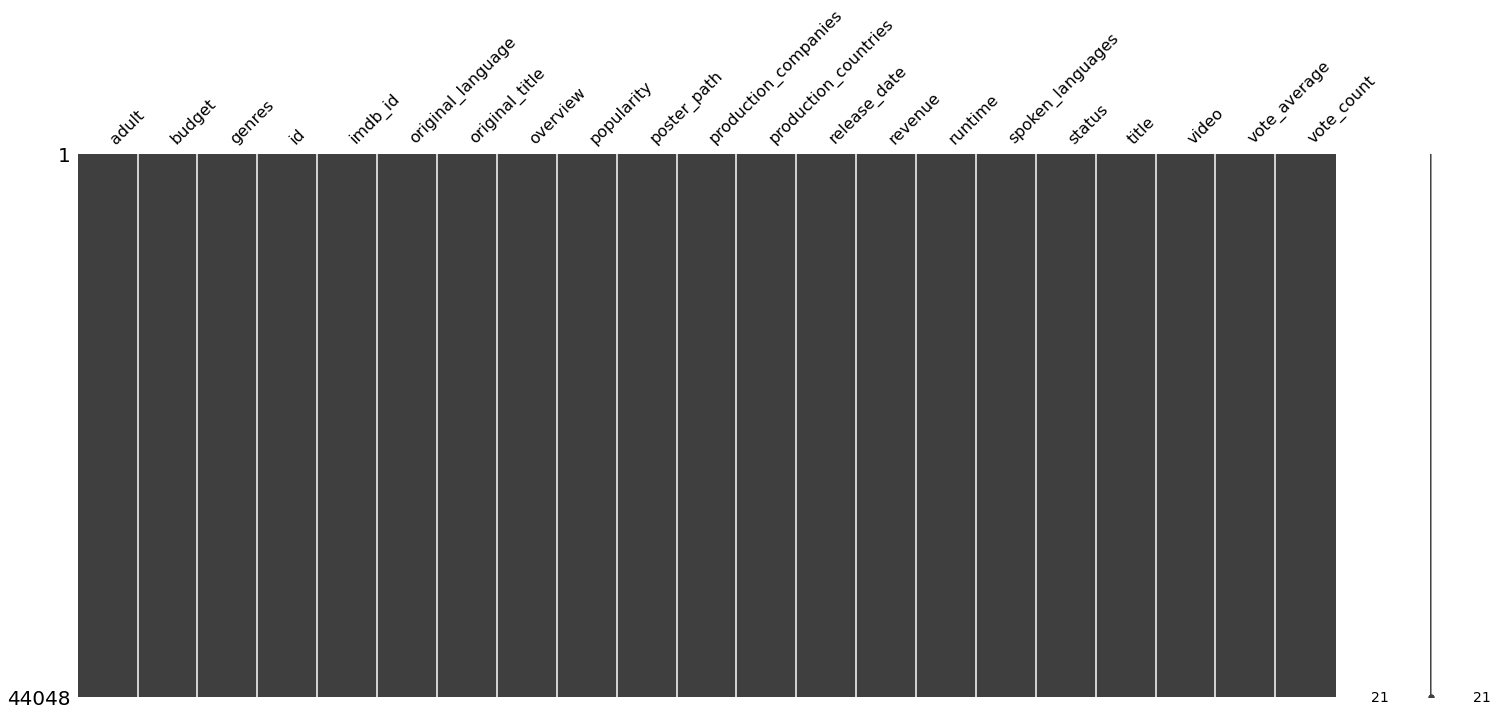

In [30]:
msno.matrix(movies_df_cleaned);

# Finding The Fun Movies

In [31]:
#movies_df_cleaned.dtypes

movies_df_cleaned['popularity'] = movies_df_cleaned['popularity'].astype('float')

mostpop = movies_df_cleaned[movies_df_cleaned['popularity'] == movies_df_cleaned['popularity'].max()]

print("The most popular movie in this dataset is {}".format(mostpop.original_title.values[0]))

The most popular movie in this dataset is Minions


In [32]:
leastpop = movies_df_cleaned[movies_df_cleaned['popularity'] == movies_df_cleaned['popularity'].min()]

print("The least popular movie in this dataset is {}".format(leastpop.original_title.values[0]))

The least popular movie in this dataset is Night of the Zombies


In [35]:
#movies_df_cleaned.dtypes

# Runtime is a float datatype so we can run this calculation with no issues

longest = movies_df_cleaned[movies_df_cleaned['runtime'] == movies_df_cleaned['runtime'].max()]

print("The longest movie in this dataset is {}".format(longest.original_title.values[0]))

The least popular movie in this dataset is Centennial


In [37]:
#movies_df_cleaned.dtypes

money_movies = movies_df_cleaned[movies_df_cleaned['revenue'] == movies_df_cleaned['revenue'].max()]

print("The movie that made the most money in this dataset is {}".format(money_movies.original_title.values[0]))

The movie that made the most money in this dataset is Avatar


In [39]:
movies_df_cleaned['revenue/min'] = movies_df_cleaned['revenue']/movies_df_cleaned['runtime']

rev_min = movies_df_cleaned[movies_df_cleaned['revenue/min'] == movies_df_cleaned['revenue/min'].max()]

print("The movie that made the most money per minute of runtime in this dataset is {}".format(rev_min.original_title.values[0]))

The movie that made the most money per minute of runtime in this dataset is Street Knight
